In [202]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Data


## Create time series for:
 $$ x(t) = \sin(\omega t^2) $$



In [0]:
series = np.sin((0.1*np.arange(400))**2) # Squaring input argument, so frequency and period changes over time.

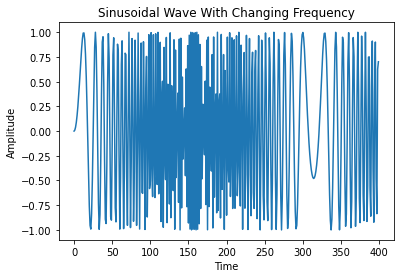

In [205]:
# plot it
plt.plot(series)
plt.title("Sinusoidal Wave With Changing Frequency")
plt.ylabel("Amplitude")
plt.xlabel('Time')
plt.show()

In [0]:
# let's see if we can use T past values to predict the next value
T = 10 # 10 previous time steps to predict the next time step
D = 1 # 1 numeric feature
X = []# Using fixed size numpy arrays would probably be better
Y = []

# Final target index: len(series) - 1
# Final t: len(series) - T - 1
# Final target index: Final t + T
# If we plug in value of little t ...
# Final target index: [len(series) - T - 1] + T
# Final target index: len(series) - 1
for t in range(len(series) - T): # 0 to len(series) - T - 1
  x = series[t:T+t] # t to t + T - 1
  X.append(x)
  y = series[t+T] # t + T
  Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T x D
Y = np.array(Y)
N = len(X)

X_train = X[:-N//2]
X_test = X[-N//2:]
Y_train = Y[:-N//2]
Y_test = Y[-N//2:]

# Build Autoregressive Model

In [0]:
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='mse',
               metrics=['accuracy'])

In [208]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs=90)

Epoch 1/90
7/7 [==============================] - 0s 13ms/step - loss: 1.6987 - accuracy: 0.0000e+00 - val_loss: 1.0055 - val_accuracy: 0.0000e+00
Epoch 2/90
7/7 [==============================] - 0s 7ms/step - loss: 1.4037 - accuracy: 0.0000e+00 - val_loss: 0.9219 - val_accuracy: 0.0000e+00
Epoch 3/90
7/7 [==============================] - 0s 5ms/step - loss: 1.1887 - accuracy: 0.0000e+00 - val_loss: 0.8544 - val_accuracy: 0.0000e+00
Epoch 4/90
7/7 [==============================] - 0s 6ms/step - loss: 1.0255 - accuracy: 0.0000e+00 - val_loss: 0.8153 - val_accuracy: 0.0000e+00
Epoch 5/90
7/7 [==============================] - 0s 6ms/step - loss: 0.8822 - accuracy: 0.0000e+00 - val_loss: 0.7833 - val_accuracy: 0.0000e+00
Epoch 6/90
7/7 [==============================] - 0s 5ms/step - loss: 0.7780 - accuracy: 0.0000e+00 - val_loss: 0.7456 - val_accuracy: 0.0000e+00
Epoch 7/90
7/7 [==============================] - 0s 7ms/step - loss: 0.7096 - accuracy: 0.0000e+00 - val_loss: 0.7114 - va

# Evaluate Autoregressive Model

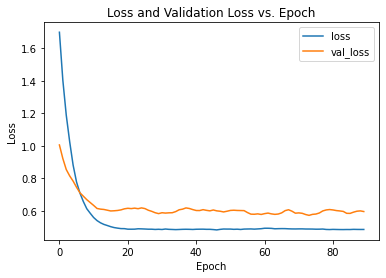

In [209]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [0]:
# Single step forecast (wrong way)
predictions_test = []
i = -N//2
while (len(predictions_test) < len(Y_test)):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

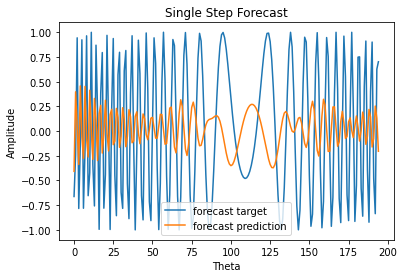

In [211]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Single Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()

In [0]:
# Multi step forecast - uses predictions for making future predictions
predictions_test = []

# Last train input
x_last = X[-N//2]

while (len(predictions_test) < len(Y_test)):
  p = model.predict(x_last.reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

  # Shift x_last vector of T values by 1 value to the left
  x_last = np.roll(x_last, -1)
  # Make last x_last element the prediction
  x_last[-1] = p

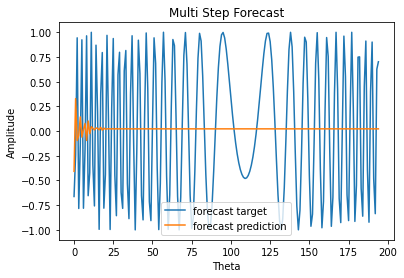

In [213]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Multi Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()
# Linear model does bad foreast for non-linear data

# Build Simple RNN Model



In [0]:
i = Input(shape=(T, D))
x = SimpleRNN(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='mse')

In [215]:
print(model.summary())

Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_20 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 10)                120       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
None


In [216]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs=90)

Epoch 1/90
7/7 [==============================] - 0s 23ms/step - loss: 1.3270 - val_loss: 1.3191
Epoch 2/90
7/7 [==============================] - 0s 8ms/step - loss: 0.6588 - val_loss: 0.8886
Epoch 3/90
7/7 [==============================] - 0s 8ms/step - loss: 0.5319 - val_loss: 0.6140
Epoch 4/90
7/7 [==============================] - 0s 9ms/step - loss: 0.4890 - val_loss: 0.5107
Epoch 5/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4767 - val_loss: 0.5226
Epoch 6/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4510 - val_loss: 0.4880
Epoch 7/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4282 - val_loss: 0.4876
Epoch 8/90
7/7 [==============================] - 0s 7ms/step - loss: 0.3989 - val_loss: 0.5113
Epoch 9/90
7/7 [==============================] - 0s 8ms/step - loss: 0.3822 - val_loss: 0.5094
Epoch 10/90
7/7 [==============================] - 0s 8ms/step - loss: 0.3633 - val_loss: 0.4792
Epoch 11/90
7/7 [=====================

# Evaluate Simple RNN Model

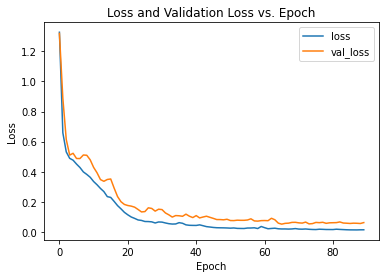

In [217]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
# Loss is better

In [0]:
# Single step forecast (wrong way)
predictions_test = []
i = -N//2
while (len(predictions_test) < len(Y_test)):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

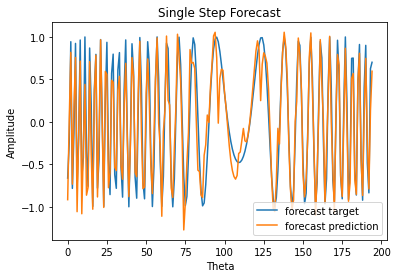

In [219]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Single Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()
# Single step forecast is better

In [0]:
# Multi step forecast - correct way - uses predictions for making future predictions
predictions_test = []

# Last train input
x_last = X[-N//2]

while (len(predictions_test) < len(Y_test)):
  p = model.predict(x_last.reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

  # Shift x_last vector of T values by 1 value to the left
  x_last = np.roll(x_last, -1)
  # Make last x_last element the prediction
  x_last[-1] = p

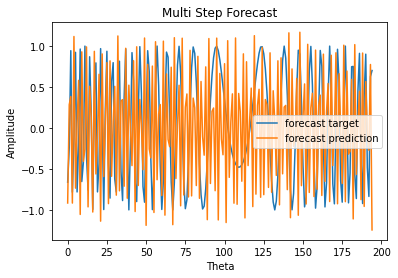

In [221]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Multi Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()
# Simple RNN captures frequency well, except for where it suddenly changes

# Build LSTM Model

In [0]:
i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.01),
              loss='mse')


In [223]:
print(model.summary())

Model: "model_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 10)                480       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________
None


In [224]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs=90)

Epoch 1/90
7/7 [==============================] - 1s 96ms/step - loss: 0.5344 - val_loss: 0.4785
Epoch 2/90
7/7 [==============================] - 0s 10ms/step - loss: 0.5136 - val_loss: 0.5050
Epoch 3/90
7/7 [==============================] - 0s 8ms/step - loss: 0.5038 - val_loss: 0.5243
Epoch 4/90
7/7 [==============================] - 0s 9ms/step - loss: 0.5033 - val_loss: 0.5456
Epoch 5/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4965 - val_loss: 0.5632
Epoch 6/90
7/7 [==============================] - 0s 9ms/step - loss: 0.4863 - val_loss: 0.5419
Epoch 7/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4713 - val_loss: 0.5375
Epoch 8/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4456 - val_loss: 0.5662
Epoch 9/90
7/7 [==============================] - 0s 8ms/step - loss: 0.4128 - val_loss: 0.6155
Epoch 10/90
7/7 [==============================] - 0s 10ms/step - loss: 0.3879 - val_loss: 0.6334
Epoch 11/90
7/7 [===================

# Evaluate LSTM Model

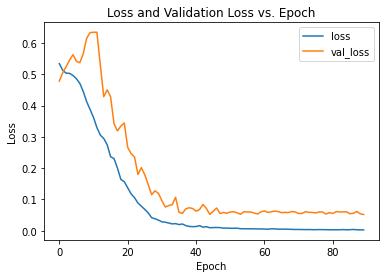

In [225]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [0]:
# Single step forecast (wrong way)
predictions_test = []
i = -N//2
while (len(predictions_test) < len(Y_test)):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

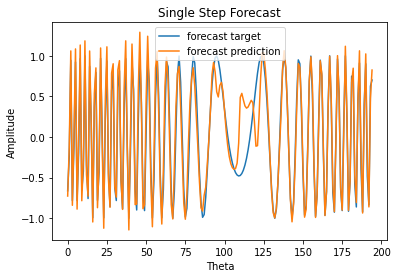

In [227]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Single Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()

In [0]:
# Multi step forecast - correct way - uses predictions for making future predictions
predictions_test = []

# Last train input
x_last = X[-N//2]

while (len(predictions_test) < len(Y_test)):
  p = model.predict(x_last.reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

  # Shift x_last vector of T values by 1 value to the left
  x_last = np.roll(x_last, -1)
  # Make last x_last element the prediction
  x_last[-1] = p

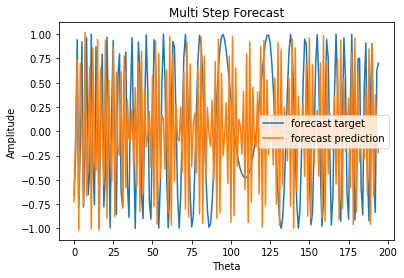

In [229]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Multi Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()
# Similar performance to Simple RNN